# Indian Sign Language Recognition 

Abstract: Auditory perception enables an individual to sense sound vibrations caused due to the variations in pressure present. In accordance with WHO, 6.3% of the Indian population suffer from hearing disability. People that suffer from hearing impairment communicate using hand gestures. Unfortunately, the vast majority of the people in India are not aware of the semantics of these gestures. To bridge the gap between the people suffering from the hearing disability and those who are not, we have proposed an Indian sign language Recognition system using machine learning algorithm techniques. Our method utilizes several images of people demonstrating the alphabets in Indian Sign Language. These images were preprocessed, and further, we utilized these obtained images for training and testing our Machine Learning Algorithms.

### Done By: 
### Madhura Inamdar: 1812026
### Mitali Potnis: 1812048
### Divya Raul: 1812051

## Code :

### Taking the Pre-processed csv file.

In [1]:
import pandas as pd
# Reading the csv file.
test_input=pd.read_csv('.\data_isl\data_isl\generated\images_transformed.csv',header=None)
target=test_input[0]
test_input=test_input.drop(0,axis=1)
#test_input
# Displaying the target values for our data:
target

0      a
1      a
2      a
3      a
4      a
      ..
445    z
446    z
447    z
448    z
449    z
Name: 0, Length: 450, dtype: object

In [2]:
# Displaying the number of rows and columns of the test data set
test_input.shape

(450, 900)

## Training the Models and fitting and testing the fitted model-

### 1) K- Nearest Neighbours:

In [8]:
# Importing the required libraries
import os
import sys
import csv
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
#from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier


# Defining the function for reading the transformed images:
def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


# Generating the model:
def generate_knn_classifier():
    num_neighbours = 10
    print("\nGenerating KNN model with number of neighbours = '{}'...".format(
        num_neighbours))
    classifier_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    print("Done!\n")
    return classifier_model


# Divinding the Train and Test Dataset
def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret

images_transformed_path = ".\data_isl\data_isl\generated\images_transformed.csv"
images, labels = read_images_transformed(images_transformed_path)
classifier_model = generate_knn_classifier()
print("Model used = KNN Classifier")
training_images, testing_images, training_labels, testing_labels = divide_data_train_test(images, labels, 0.2)
        
print("\nTraining the model...")
# Fitting the model on the train data
classifier_model = classifier_model.fit(training_images, training_labels)
print("Done!\n")

# Printing the Results obtained
print("\nWriting model stats to file...")
score = classifier_model.score(testing_images, testing_labels)
print("Model Score:", score)

predicted = classifier_model.predict(testing_images)
report = metrics.classification_report(testing_labels, predicted)
print(report)

print("\nFinished!\n")


Reading the transformed images file located at path '.\data_isl\data_isl\generated\images_transformed.csv'...
Done!


Generating KNN model with number of neighbours = '10'...
Done!

Model used = KNN Classifier

Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Writing model stats to file...
Model Score: 0.9
              precision    recall  f1-score   support

           a       1.00      0.67      0.80         6
           b       0.90      1.00      0.95         9
           d       1.00      1.00      1.00         3
           e       0.67      1.00      0.80         2
           f       0.75      1.00      0.86         3
           g       0.75      1.00      0.86         6
           h       1.00      1.00      1.00         7
           k       1.00      1.00      1.00         4
           m       1.00      1.00      1.00         5
           n       1.00      1.00      1.00         5
           o       0.40      1.00      0.57

In [13]:
import sys
import traceback
import cv2

testing_images_labels_path = "./data_isl/data_isl/generated/training_images_labels.txt"
total=len(target)
cnt=0
predicted_labels = classifier_model.predict(test_input)
for i in range(total):
        if target[i] != predicted_labels[i]:
                    cnt += 1
print(str(cnt)+" "+str(total))
# printing the accuracy of the model
print("Accuracy of KNN Classifier Classification on Test Data is: "+str((total-cnt)/total))
knn_score = (total-cnt)/total
cv2.destroyAllWindows()
print ("The program completed successfully !!")


59 450
Accuracy of KNN Classifier Classification on Test Data is: 0.8688888888888889
The program completed successfully !!


### Logistic Classifier:

In [14]:
def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


# Generating the model:
def generate_logistic_classifier():
    print("\nGenerating Logistic-regression model...")
    classifier_model = linear_model.LogisticRegression()
    print("Done!\n")
    return classifier_model


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


images_transformed_path = ".\data_isl\data_isl\generated\images_transformed.csv"
images, labels = read_images_transformed(images_transformed_path)
classifier_model = generate_logistic_classifier()
    
print("Model used = Logistic Classifier")
training_images, testing_images, training_labels, testing_labels = divide_data_train_test(images, labels, 0.2)
        
print("\nTraining the model...")
 # Fitting the model on the train data
classifier_model = classifier_model.fit(training_images, training_labels)
print("Done!\n")

# Printing the Results obtained
print("\nWriting model stats to file...")
score = classifier_model.score(testing_images, testing_labels)
print("Model Score:", score)

predicted = classifier_model.predict(testing_images)
report = metrics.classification_report(testing_labels, predicted)
print(report)

print("\nFinished!\n")




Reading the transformed images file located at path '.\data_isl\data_isl\generated\images_transformed.csv'...
Done!


Generating Logistic-regression model...
Done!

Model used = Logistic Classifier

Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Writing model stats to file...
Model Score: 0.9
              precision    recall  f1-score   support

           a       0.75      0.50      0.60         6
           b       1.00      1.00      1.00         9
           d       1.00      1.00      1.00         3
           e       1.00      1.00      1.00         2
           f       0.60      1.00      0.75         3
           g       1.00      1.00      1.00         6
           h       1.00      1.00      1.00         7
           k       0.80      1.00      0.89         4
           m       1.00      1.00      1.00         5
           n       1.00      1.00      1.00         5
           o       0.67      1.00      0.80         2
 

C:\Users\mital\anaconda3\envs\tensorflowsessions\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
import sys
import traceback

import cv2

testing_images_labels_path = "./data_isl/data_isl/generated/training_images_labels.txt"
total=len(target)
cnt=0
predicted_labels = classifier_model.predict(test_input)
for i in range(total):
        if target[i] != predicted_labels[i]:
                    cnt += 1
print(str(cnt)+" "+str(total))
# printing the accuracy of the model
log_score = (total-cnt)/total
print("Accuracy of Logistic Classifier Classification on Test Data is: "+str((total-cnt)/total))
cv2.destroyAllWindows()
print ("The program completed successfully !!")


9 450
Accuracy of Logistic Classifier Classification on Test Data is: 0.98
The program completed successfully !!


### Gaussian Naive Bayes:

In [17]:



def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels



# Generating the model:
def generate_GaussianNB_classifier():
    print("\nGenerating GaussianNB model...")
    classifier_model = GaussianNB()
    print("Done!\n")
    return classifier_model


def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


images_transformed_path = ".\data_isl\data_isl\generated\images_transformed.csv"
images, labels = read_images_transformed(images_transformed_path)
classifier_model = generate_GaussianNB_classifier()
    
print("Model used = Gaussian Naive Bayes Classifier")
training_images, testing_images, training_labels, testing_labels = divide_data_train_test(images, labels, 0.2)
        
print("\nTraining the model...")
 # Fitting the model on the train data
classifier_model = classifier_model.fit(training_images, training_labels)
print("Done!\n")

# Printing the Results obtained
print("\nWriting model stats to file...")
score = classifier_model.score(testing_images, testing_labels)
print("Model Score:", score)

predicted = classifier_model.predict(testing_images)
report = metrics.classification_report(testing_labels, predicted)
print(report)

print("\nFinished!\n")




Reading the transformed images file located at path '.\data_isl\data_isl\generated\images_transformed.csv'...
Done!


Generating GaussianNB model...
Done!

Model used = Gaussian Naive Bayes Classifier

Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Writing model stats to file...
Model Score: 0.5
              precision    recall  f1-score   support

           a       0.16      0.50      0.24         6
           b       0.82      1.00      0.90         9
           d       1.00      0.67      0.80         3
           e       0.00      0.00      0.00         2
           f       0.00      0.00      0.00         3
           g       1.00      0.17      0.29         6
           h       1.00      0.43      0.60         7
           k       0.00      0.00      0.00         4
           m       1.00      0.20      0.33         5
           n       0.00      0.00      0.00         5
           o       1.00      0.50      0.67         

C:\Users\mital\anaconda3\envs\tensorflowsessions\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mital\anaconda3\envs\tensorflowsessions\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mital\anaconda3\envs\tensorflowsessions\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [18]:
import sys
import traceback

import cv2

testing_images_labels_path = "./data_isl/data_isl/generated/training_images_labels.txt"
total=len(target)
cnt=0
predicted_labels = classifier_model.predict(test_input)
for i in range(total):
        if target[i] != predicted_labels[i]:
                    cnt += 1
print(str(cnt)+" "+str(total))

# printing the accuracy of the model
NB_score = (total-cnt)/total
print("Accuracy of Gaussian Naive Bayes Classifier Classification on Test Data is: "+str((total-cnt)/total))
cv2.destroyAllWindows()
print ("The program completed successfully !!")

59 450
Accuracy of Gaussian Naive Bayes Classifier Classification on Test Data is: 0.8688888888888889
The program completed successfully !!


### Descision Tree Classifier:

In [19]:



def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels


# Generating the model:

def generate_DecisionTree_classifier():
    print("\nGenerating DecisionTree model...")
    classifier_model = DecisionTreeClassifier()
    print("Done!\n")
    return classifier_model

def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


images_transformed_path = ".\data_isl\data_isl\generated\images_transformed.csv"
images, labels = read_images_transformed(images_transformed_path)
classifier_model = generate_DecisionTree_classifier()
    
print("Model used = Descision Tree Classifier")
training_images, testing_images, training_labels, testing_labels = divide_data_train_test(images, labels, 0.2)
 # Fitting the model on the train data.       
print("\nTraining the model...")
classifier_model = classifier_model.fit(training_images, training_labels)
print("Done!\n")


# Printing the Results obtained
print("\nWriting model stats to file...")
score = classifier_model.score(testing_images, testing_labels)
print("Model Score:", score)

predicted = classifier_model.predict(testing_images)
report = metrics.classification_report(testing_labels, predicted)
print(report)

print("\nFinished!\n")




Reading the transformed images file located at path '.\data_isl\data_isl\generated\images_transformed.csv'...
Done!


Generating DecisionTree model...
Done!

Model used = Descision Tree Classifier

Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Writing model stats to file...
Model Score: 0.8222222222222222
              precision    recall  f1-score   support

           a       0.75      0.50      0.60         6
           b       1.00      0.89      0.94         9
           d       0.75      1.00      0.86         3
           e       1.00      1.00      1.00         2
           f       1.00      1.00      1.00         3
           g       0.86      1.00      0.92         6
           h       0.83      0.71      0.77         7
           k       0.67      1.00      0.80         4
           m       1.00      0.40      0.57         5
           n       1.00      0.80      0.89         5
           o       0.67      1.00      0.

In [20]:
import sys
import traceback

import cv2

testing_images_labels_path = "./data_isl/data_isl/generated/training_images_labels.txt"
total=len(target)
cnt=0
predicted_labels = classifier_model.predict(test_input)
for i in range(total):
        if target[i] != predicted_labels[i]:
                    cnt += 1
print(str(cnt)+" "+str(total))
# printing the accuracy of the model
tree_score = (total-cnt)/total
print("Accuracy of Descision Tree Classifier Classification on Test Data is: "+str((total-cnt)/total))
cv2.destroyAllWindows()
print ("The program completed successfully !!")

16 450
Accuracy of Descision Tree Classifier Classification on Test Data is: 0.9644444444444444
The program completed successfully !!


### Random Forest Classifier:

In [21]:


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels



# Generating the model:

def generate_RandomForest_classifier():
    print("\nGenerating RandomForest model...")
    classifier_model = RandomForestClassifier()
    print("Done!\n")
    return classifier_model

def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


images_transformed_path = ".\data_isl\data_isl\generated\images_transformed.csv"
images, labels = read_images_transformed(images_transformed_path)
classifier_model = generate_RandomForest_classifier()
    
print("Model used = Random Forest Classifier")
training_images, testing_images, training_labels, testing_labels = divide_data_train_test(images, labels, 0.2)
        
print("\nTraining the model...")
 # Fitting the model on the train data
classifier_model = classifier_model.fit(training_images, training_labels)
print("Done!\n")

# Printing the Results obtained
print("\nWriting model stats to file...")
score = classifier_model.score(testing_images, testing_labels)
print("Model Score:", score)

predicted = classifier_model.predict(testing_images)
report = metrics.classification_report(testing_labels, predicted)
print(report)

print("\nFinished!\n")




Reading the transformed images file located at path '.\data_isl\data_isl\generated\images_transformed.csv'...
Done!


Generating RandomForest model...
Done!

Model used = Random Forest Classifier

Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Writing model stats to file...
Model Score: 0.9222222222222223
              precision    recall  f1-score   support

           a       1.00      0.50      0.67         6
           b       0.90      1.00      0.95         9
           d       1.00      1.00      1.00         3
           e       1.00      1.00      1.00         2
           f       1.00      1.00      1.00         3
           g       1.00      1.00      1.00         6
           h       1.00      1.00      1.00         7
           k       1.00      1.00      1.00         4
           m       1.00      1.00      1.00         5
           n       1.00      1.00      1.00         5
           o       1.00      1.00      1.0

In [22]:
import sys
import traceback

import cv2

testing_images_labels_path = "./data_isl/data_isl/generated/training_images_labels.txt"
total=len(target)
cnt=0
predicted_labels = classifier_model.predict(test_input)
for i in range(total):
        if target[i] != predicted_labels[i]:
                    cnt += 1
print(str(cnt)+" "+str(total))
# printing the accuracy of the model
forest_score = _score = (total-cnt)/total
print("Accuracy of Random Forest Classifier Classification on Test Data is: "+str((total-cnt)/total))
cv2.destroyAllWindows()
print ("The program completed successfully !!")

7 450
Accuracy of Random Forest Classifier Classification on Test Data is: 0.9844444444444445
The program completed successfully !!


### Support Vector Machine:

In [23]:


def read_images_transformed(images_transformed_path):
    print("\nReading the transformed images file located at path '{}'...".format(
        images_transformed_path))

    images = []
    labels = []
    with open(images_transformed_path) as images_transformed_file:
        reader = csv.reader(images_transformed_file, delimiter=',')
        cnt = 0
        for line in reader:
            if len(line)==0:
                continue
            cnt = cnt + 1
            label = line[0]
            labels.append(label)
            image = line[1:]
            image_int = [int(pixel) for pixel in image]
            image = np.array(image_int)
            images.append(image)
    print("Done!\n")
    return images, labels




# Generating the model:
def generate_svm_classifier():
    print("\nGenerating SVM model...")
    classifier_model = svm.SVC(kernel='poly', degree = 1)
    print("Done!\n")
    return classifier_model

def divide_data_train_test(images, labels, ratio):
    print("\nDividing dataset in the ratio '{}' using `train_test_split()`:".format(ratio))
    ret = train_test_split(images, labels, test_size=ratio, random_state=0)
    print("Done!\n")
    return ret


images_transformed_path = ".\data_isl\data_isl\generated\images_transformed.csv"
images, labels = read_images_transformed(images_transformed_path)
classifier_model = generate_svm_classifier()

print("Model used = Support Vector Machine Classifier")
training_images, testing_images, training_labels, testing_labels = divide_data_train_test(images, labels, 0.2)
        
print("\nTraining the model...")
 # Fitting the model on the train data
classifier_model = classifier_model.fit(training_images, training_labels)
print("Done!\n")

# Printing the Results obtained
print("\nWriting model stats to file...")
score = classifier_model.score(testing_images, testing_labels)
print("Model Score:", score)

predicted = classifier_model.predict(testing_images)
report = metrics.classification_report(testing_labels, predicted)
print(report)

print("\nFinished!\n")




Reading the transformed images file located at path '.\data_isl\data_isl\generated\images_transformed.csv'...
Done!


Generating SVM model...
Done!

Model used = Support Vector Machine Classifier

Dividing dataset in the ratio '0.2' using `train_test_split()`:
Done!


Training the model...
Done!


Writing model stats to file...
Model Score: 0.9111111111111111
              precision    recall  f1-score   support

           a       1.00      0.50      0.67         6
           b       1.00      1.00      1.00         9
           d       1.00      1.00      1.00         3
           e       1.00      1.00      1.00         2
           f       0.75      1.00      0.86         3
           g       1.00      1.00      1.00         6
           h       1.00      1.00      1.00         7
           k       1.00      1.00      1.00         4
           m       1.00      1.00      1.00         5
           n       0.83      1.00      0.91         5
           o       1.00      1.00      1.0

C:\Users\mital\anaconda3\envs\tensorflowsessions\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mital\anaconda3\envs\tensorflowsessions\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mital\anaconda3\envs\tensorflowsessions\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [24]:
import sys
import traceback

import cv2

testing_images_labels_path = "./data_isl/data_isl/generated/training_images_labels.txt"
total=len(target)
cnt=0
predicted_labels = classifier_model.predict(test_input)
for i in range(total):
        if target[i] != predicted_labels[i]:
                    cnt += 1
print(str(cnt)+" "+str(total))
# printing the accuracy of the model
svm_score = _score = (total-cnt)/total
print("Accuracy of Support Vector Machine Classifier Classification on Test Data is: "+str((total-cnt)/total))
cv2.destroyAllWindows()
print ("The program completed successfully !!")

19 450
Accuracy of Support Vector Machine Classifier Classification on Test Data is: 0.9577777777777777
The program completed successfully !!


## -------------------------------------------------------------------------------------------------------------------------------

### Results: Comparing the Model Scores for all the Models.

No handles with labels found to put in legend.


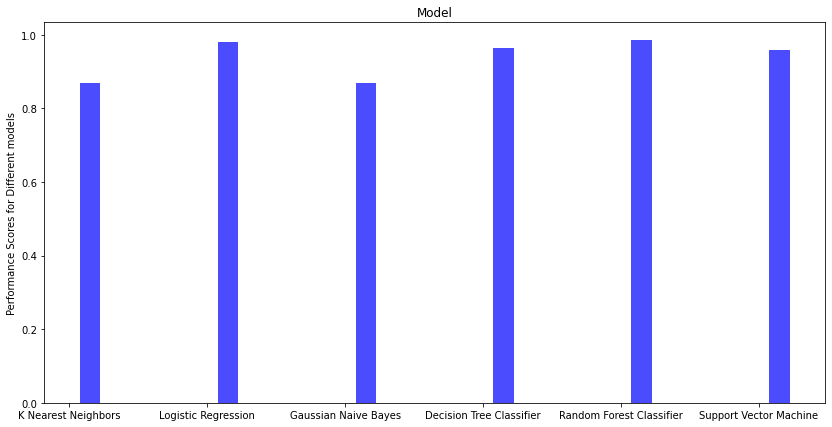

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

models = ["K Nearest Neighbors", "Logistic Regression",  "Gaussian Naive Bayes",  "Decision Tree Classifier" , "Random Forest Classifier", "Support Vector Machine"]
model = np.arange(len(models))

scores = [knn_score, log_score, NB_score,  tree_score, forest_score, svm_score]

plt.bar(model+0.15, scores, align='center', width = 0.15, alpha=0.7, color = 'blue')
plt.xticks(model, models)



plt.ylabel('Performance Scores for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()       


In [38]:
models = ["K Nearest Neighbors", "Logistic Regression",  "Gaussian Naive Bayes",  "Decision Tree Classifier" , "Random Forest Classifier", "Support Vector Machine"]

scores = [knn_score, log_score, NB_score,  tree_score, forest_score, svm_score]
for i in range(len(scores)):
    print("",models[i],"",scores[i]*100,"%")

 K Nearest Neighbors  86.8888888888889 %
 Logistic Regression  98.0 %
 Gaussian Naive Bayes  86.8888888888889 %
 Decision Tree Classifier  96.44444444444444 %
 Random Forest Classifier  98.44444444444444 %
 Support Vector Machine  95.77777777777777 %


### Discussion:
Based on the results obtained, the  two highest-performing algorithms were found to be Random Forest Classifier and Logistic Regression with an accuracy of 98.44 % and 98.00 %, respectively that surpass the results obtained for other models. Further, the models Decision Tree Classifier and Support Vector Machine gave an accuracy score of  96.44 % and 95.77 %  respectively. The models K Nearest Neighbors and Gaussian Naive Bayes performed  the lowest with both the models giving accuracies equal to 86.88 %. 